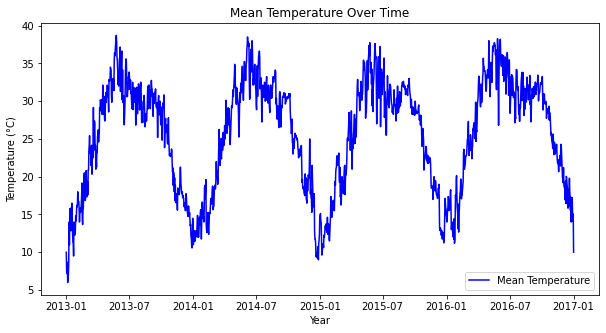

ADF Test on Original Data:
ADF Statistic: -2.0210690559206714
p-value: 0.2774121372301609
Critical Values:
   1%: -3.4348647527922824
   5%: -2.863533960720434
   10%: -2.567831568508802
Conclusion: The series is non-stationary.

ADF Test After First-Order Differencing:
ADF Statistic: -16.3787202670747
p-value: 2.7648631375945265e-29
Critical Values:
   1%: -3.4348647527922824
   5%: -2.863533960720434
   10%: -2.567831568508802
Conclusion: The series is stationary.

ADF Test After Log Transformation + Differencing:
ADF Statistic: -20.887531958410108
p-value: 0.0
Critical Values:
   1%: -3.43484922137066
   5%: -2.8635271063560412
   10%: -2.5678279184465946
Conclusion: The series is stationary.


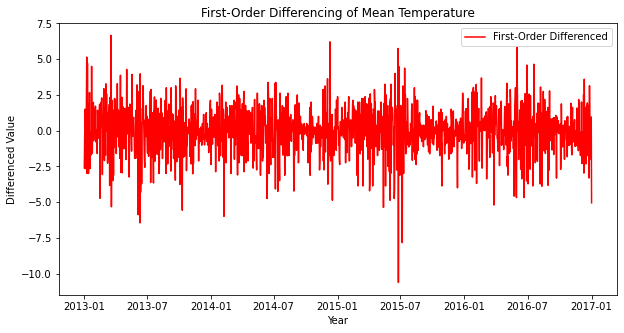

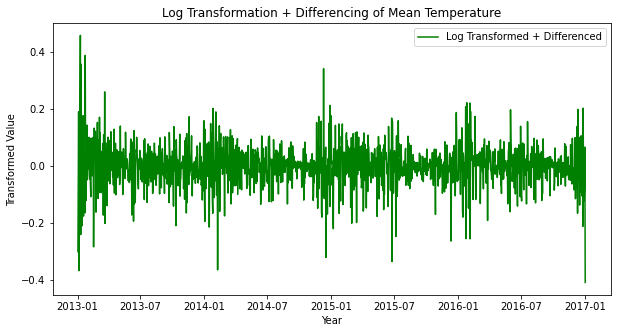

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load dataset
file_path = "C:/Users/Lenovo/Downloads/DailyDelhiClimateTrain.csv"
df = pd.read_csv(file_path)

# Convert 'date' to datetime and set as index
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# Function to perform ADF Test
def adf_test(series):
    result = adfuller(series.dropna())  # Drop NaN values
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("Conclusion: The series is stationary.")
    else:
        print("Conclusion: The series is non-stationary.")

# Plot original data
plt.figure(figsize=(10, 5))
plt.plot(df["meantemp"], label="Mean Temperature", color="blue")
plt.title("Mean Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# ADF Test on original data
print("ADF Test on Original Data:")
adf_test(df["meantemp"])

# Apply first-order differencing
df["meantemp_diff"] = df["meantemp"].diff()

# ADF Test after differencing
print("\nADF Test After First-Order Differencing:")
adf_test(df["meantemp_diff"])

# Apply log transformation followed by differencing
df["meantemp_log"] = np.log(df["meantemp"])
df["meantemp_log_diff"] = df["meantemp_log"].diff()

# ADF Test after log transformation + differencing
print("\nADF Test After Log Transformation + Differencing:")
adf_test(df["meantemp_log_diff"])

# Plot transformed data
plt.figure(figsize=(10, 5))
plt.plot(df["meantemp_diff"], label="First-Order Differenced", color="red")
plt.title("First-Order Differencing of Mean Temperature")
plt.xlabel("Year")
plt.ylabel("Differenced Value")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df["meantemp_log_diff"], label="Log Transformed + Differenced", color="green")
plt.title("Log Transformation + Differencing of Mean Temperature")
plt.xlabel("Year")
plt.ylabel("Transformed Value")
plt.legend()
plt.show()
